In [56]:
import pandas as pd
import numpy as np
import missingno as mno

from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import SGD, Adam
from keras import regularizers
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
np.random.seed(1)

In [57]:
data = pd.read_csv('train.csv')
train = data.copy()

data = pd.read_csv('test.csv')
test = data.copy()

data = pd.read_csv('store.csv')
store = data.copy()

C:\Users\Howlingwolfs\AppData\Local\Temp\ipykernel_1260\1451732182.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [60]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Merging Data

In [61]:
train = pd.merge(train, store, on='Store', how='outer')
test = pd.merge(test, store, on='Store', how='outer')

In [62]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Checking for duplicate data

In [64]:
train.duplicated().sum()

np.int64(0)

### Checking for missing data

In [65]:
train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

### Ploting the graph for missing data

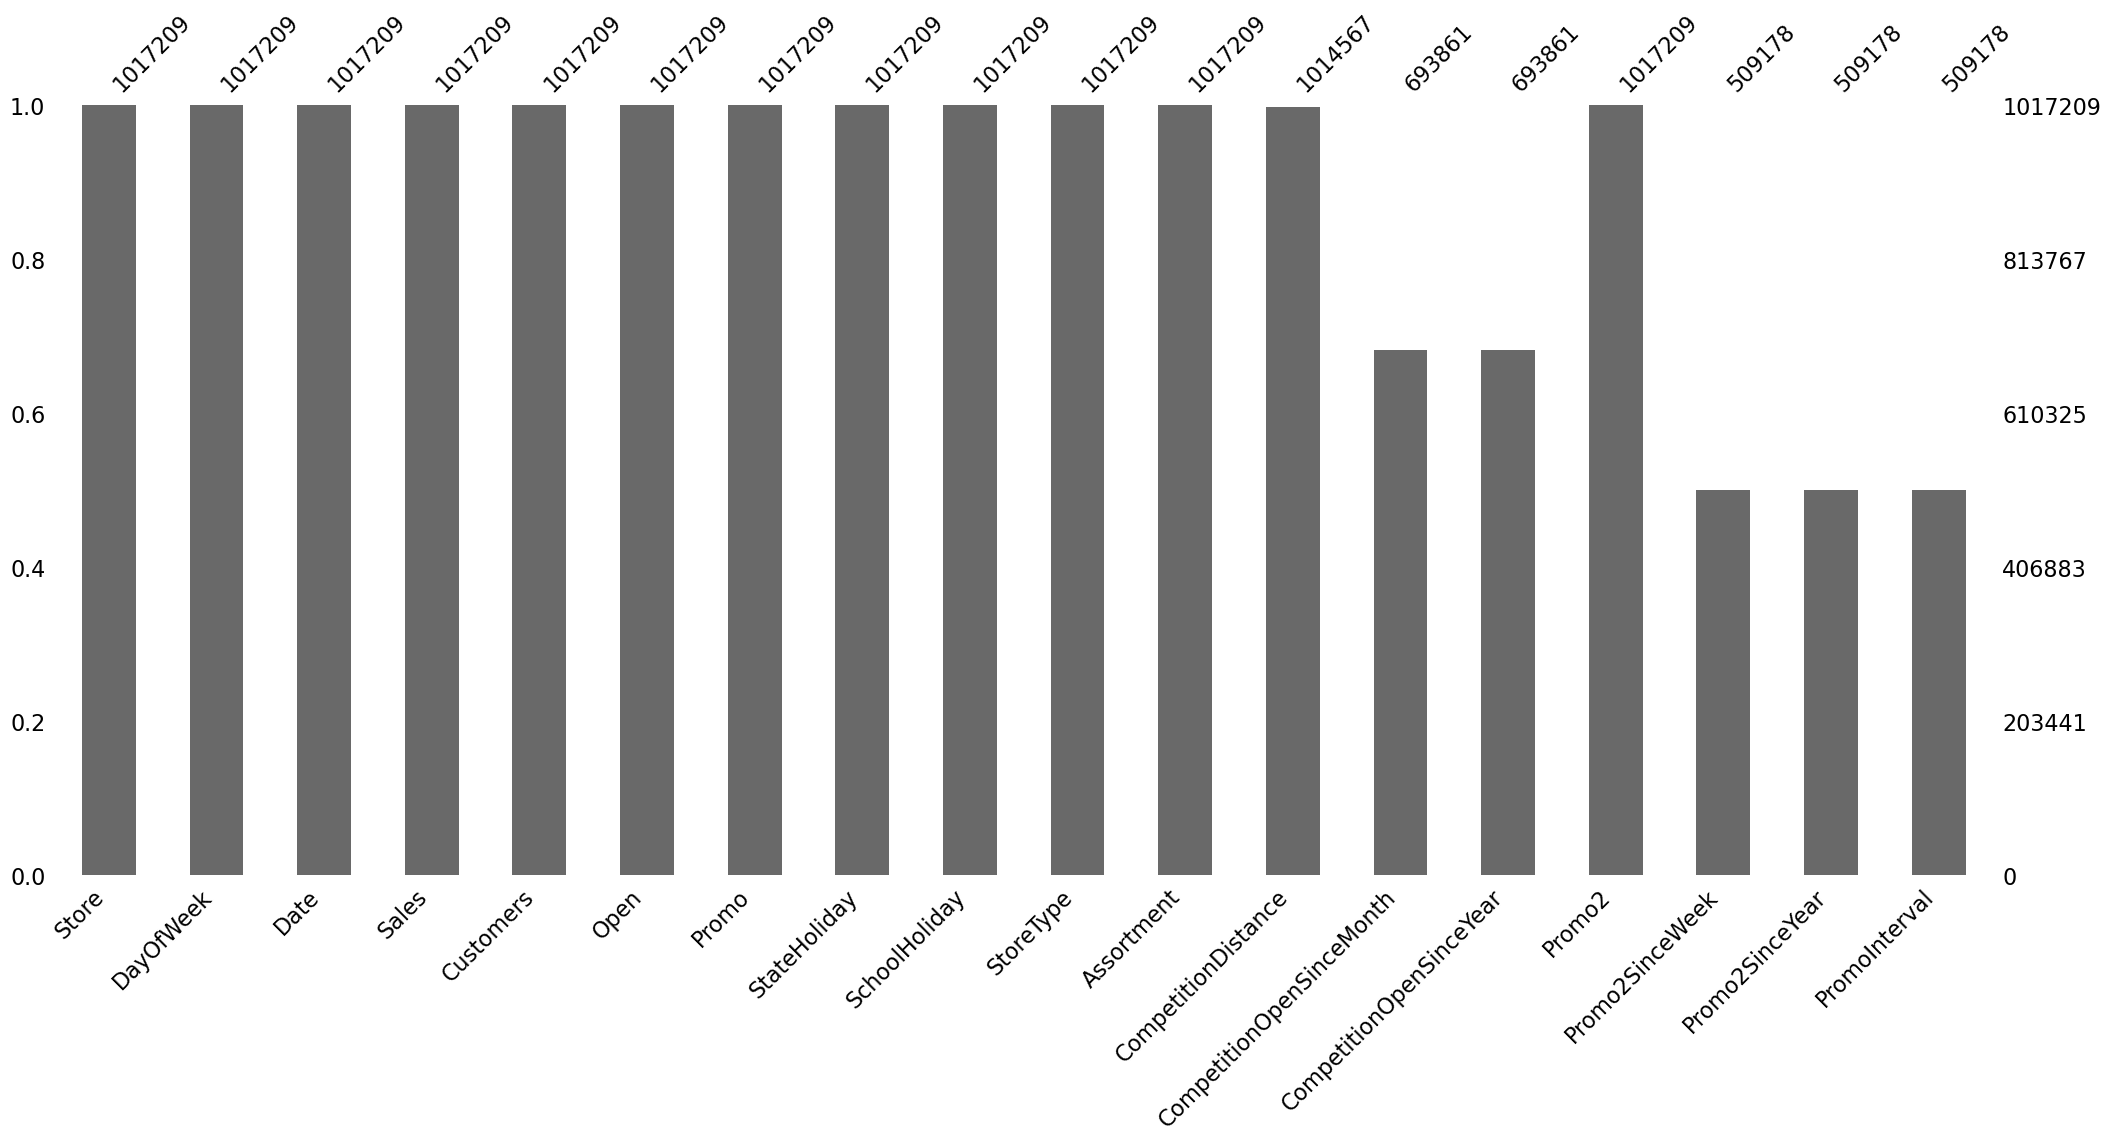

In [66]:
mno.bar(train)
plt.show()

#### Checking column "CompetitionDistance".
As you can see that there are outliers in this column

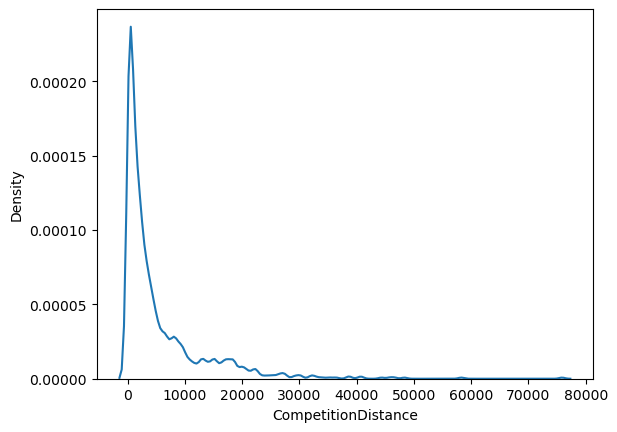

In [67]:
sns.kdeplot(train['CompetitionDistance'])
plt.show()

#### Checking skew
To replace the missing values (impute) with either the <b>mean</b> or <b>median</b> of the column we see how the data is distributed.
* <b>Mean</b> Best when data is <b>normally distributed</b>(no big outliers) - if <b>skewness is close to 0</b>
* <b>Madian</b> Best when data is <b>skewed</b> or has <b>outliers</b> - if <b>skewness is far from 0 (e.g., >1 or <-1)</b>
As you can see the skewness is greater than 1 so we use median

In [68]:
train['CompetitionDistance'].skew()

np.float64(2.9285340174784116)

In [69]:
train['CompetitionDistance'].median()

2330.0

#### Filling the data with median

In [70]:
train['CompetitionDistance'] = train['CompetitionDistance'].fillna(train['CompetitionDistance'].median())

In [71]:
train['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

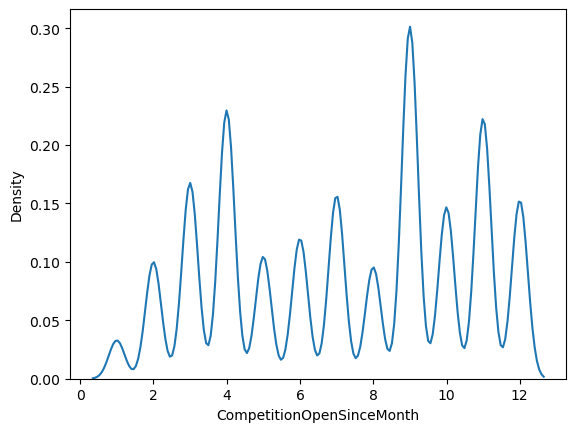

In [72]:
sns.kdeplot(train['CompetitionOpenSinceMonth'])
plt.show()

In [73]:
train['CompetitionOpenSinceMonth'].skew()

np.float64(-0.16986163462865858)

In [74]:
train['CompetitionOpenSinceMonth'].mean()

np.float64(7.222865963067531)

In [75]:
train['CompetitionOpenSinceMonth'] = train['CompetitionOpenSinceMonth'].fillna(7)

In [76]:
train['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [77]:
train['CompetitionOpenSinceYear'].skew()

np.float64(-7.5395148785892525)

In [78]:
train['CompetitionOpenSinceYear'].mean()

np.float64(2008.6902275816049)

In [79]:
train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].fillna(2008)

In [80]:
train['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [81]:
train['Promo2SinceWeek'].skew()

np.float64(0.1045275225517906)

In [82]:
train['Promo2SinceWeek'].mean()

np.float64(23.269092537383784)

In [83]:
train['Promo2SinceWeek'] = train['Promo2SinceWeek'].fillna(train['Promo2SinceWeek'].mean())

In [84]:
train['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [85]:
train['Promo2SinceYear'].skew()

np.float64(-0.12005991671486049)

In [86]:
train['Promo2SinceYear'].mean()

np.float64(2011.7527740790058)

In [87]:
train['Promo2SinceYear'] = train['Promo2SinceYear'].fillna(2011)

In [88]:
train['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [89]:
train['PromoInterval'].isnull().sum()/len(train['PromoInterval'])*100

np.float64(49.94362023930186)

In [90]:
train = train.drop('PromoInterval', axis=1)

In [91]:
train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
dtype: int64

In [92]:
train.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
dtype: object

In [93]:
train['Date'] = pd.to_datetime(train.Date)

In [94]:
# train['Year'] = train['Date'].dt.year
train['Months'] = train['Date'].dt.month

In [95]:
train['Months_sin'] = np.sin(2 * np.pi * train['Months']/12)
train['Months_cos'] = np.cos(2 * np.pi * train['Months']/12)

In [96]:
train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [97]:
def to_num(col):
    if col == '0' or col == 0:
        return 0
    elif col == 'a':
        return 1
    elif col == 'b':
        return 2
    elif col == 'c':
        return 3

In [98]:
train['StateHoliday'] = train['StateHoliday'].apply(to_num)
train['StateHoliday'].unique()

array([0, 1, 2, 3])

In [99]:
le = LabelEncoder()

In [100]:
train['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [101]:
train['StoreType'] = le.fit_transform(train['StoreType'])

In [102]:
train['Assortment'] = le.fit_transform(train['Assortment'])

In [103]:
train.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
Months                                int32
Months_sin                          float64
Months_cos                          float64
dtype: object

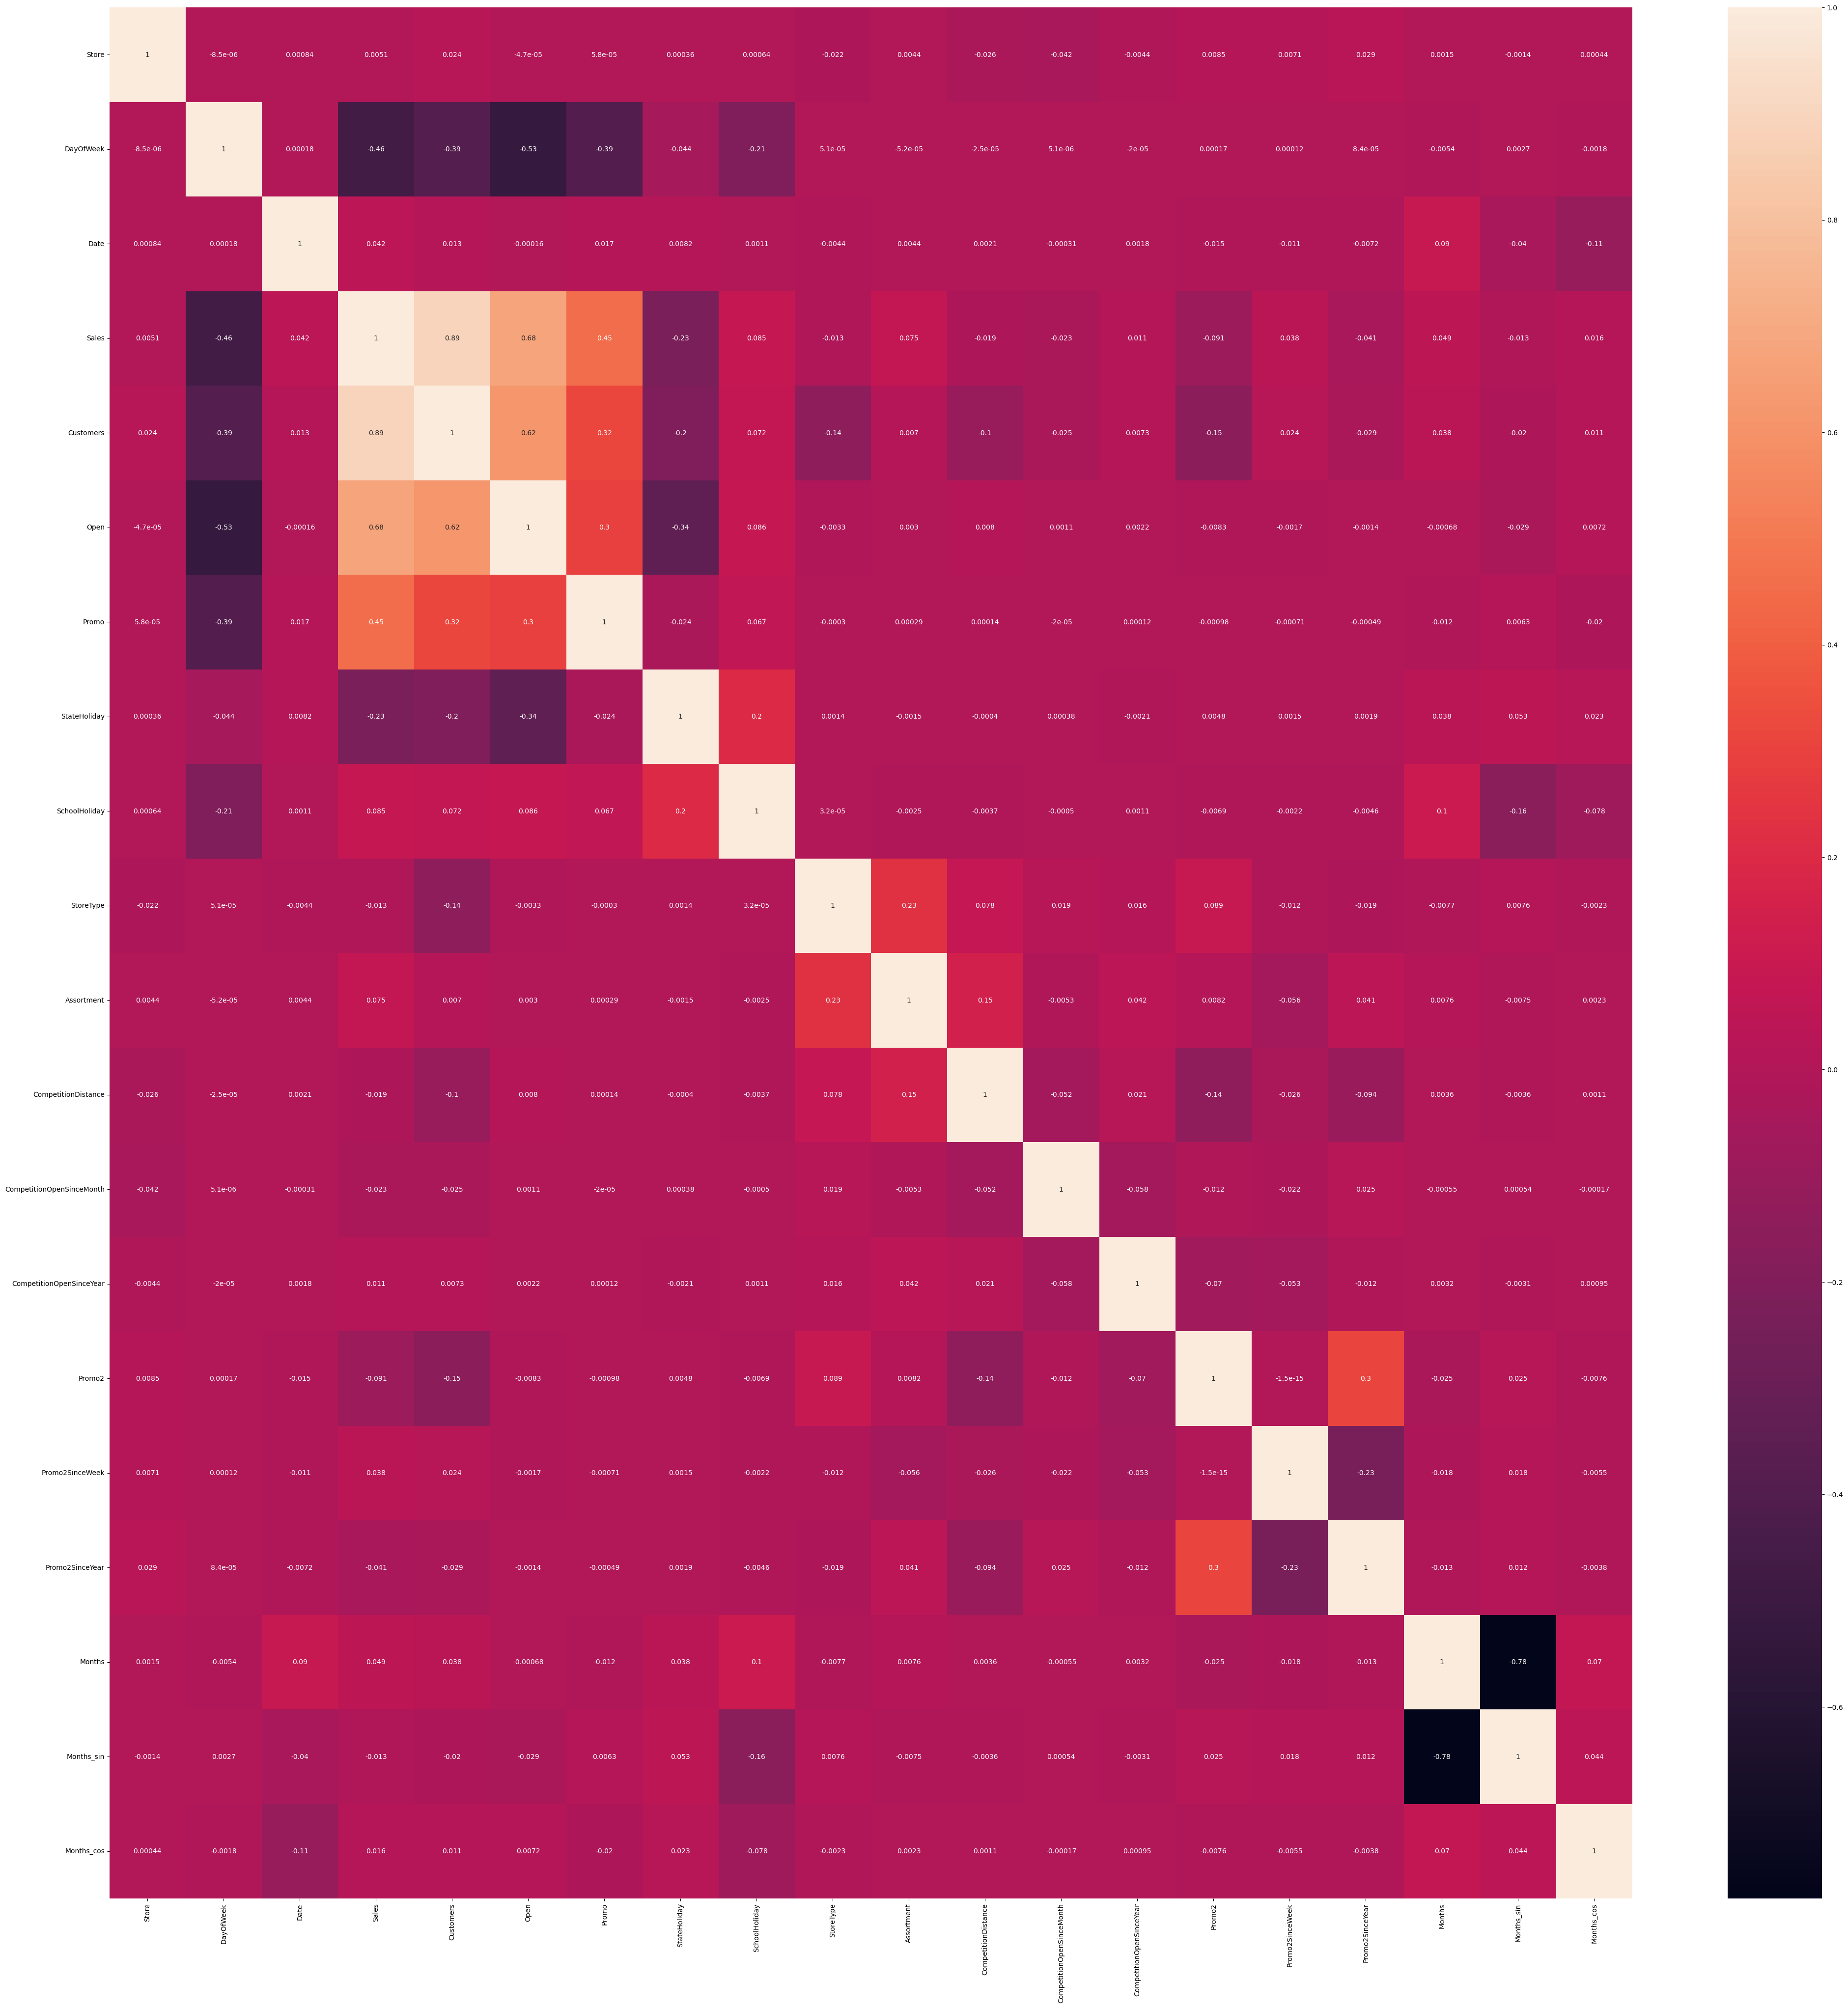

In [104]:
plt.figure(figsize=(50, 50))
cor = train.corr()
sns.heatmap(cor, annot=True);
plt.show()

In [105]:
X = train.drop(['Date', 'Months', 'Sales'], axis=1)
Y = train['Sales']

In [106]:
print(X.shape, Y.shape)

(1017209, 17) (1017209,)


In [107]:
scaler = StandardScaler()
scaler.fit(X)
X_ = scaler.transform(X)
X = pd.DataFrame(data=X_, columns = X.columns)
X.head()

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Months_sin,Months_cos
0,-1.73164,0.501484,-0.168269,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
1,-1.73164,0.000831,-0.187648,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
2,-1.73164,-0.499823,-0.237173,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
3,-1.73164,-1.000476,-0.157502,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854
4,-1.73164,-1.501129,-0.045533,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.538742,0.696115,-0.094927,-1.001128,1.781172e-15,-0.305054,-0.902875,-1.11854


In [108]:
xtrain ,xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size=0.25, random_state=12)
print('xtrain shape: ', xtrain.shape)
print('ytrain shape: ', ytrain.shape)
print()
print('xtest shape: ', xtest.shape)
print('ytest shape: ', ytest.shape)

xtrain shape:  (762906, 17)
ytrain shape:  (762906,)

xtest shape:  (254303, 17)
ytest shape:  (254303,)


In [109]:
model = Sequential()

# The Input Layer :
model.add(Dense(units=124, activation='relu', input_dim=xtrain.shape[1]))

# The Hidden Layers :
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(optimizer='adam',
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
model.summary()

C:\Users\Howlingwolfs\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 124)                 │           2,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          32,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 429,241 (1.64 MB)

 Trainable params: 429,241 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
history = model.fit(xtrain, ytrain, epochs=10)
results = model.predict(xtest)

Epoch 1/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 165s 7ms/step - loss: 595.8351 - mean_absolute_error: 595.8351  
Epoch 2/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 164s 7ms/step - loss: 412.8729 - mean_absolute_error: 412.8729
Epoch 3/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 202s 7ms/step - loss: 363.1953 - mean_absolute_error: 363.1953
Epoch 4/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 156s 7ms/step - loss: 342.6474 - mean_absolute_error: 342.6474
Epoch 5/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 146s 6ms/step - loss: 330.4343 - mean_absolute_error: 330.4343
Epoch 6/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 150s 6ms/step - loss: 322.4362 - mean_absolute_error: 322.4362
Epoch 7/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 153s 6ms/step - loss: 315.9495 - mean_absolute_error: 315.9495
Epoch 8/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 184s 8ms/step - loss: 310.0967 - mean_absolute_error: 310.0967
Epoch 9/10
23841/23841 ━━━━━━━━━━━━━━━━━━━━ 198s 8ms/step - loss: 306.3733 - mean_absolute_error: 306.3733
Epoch 10/10
23841/23841 ━━━━━━━━━━━

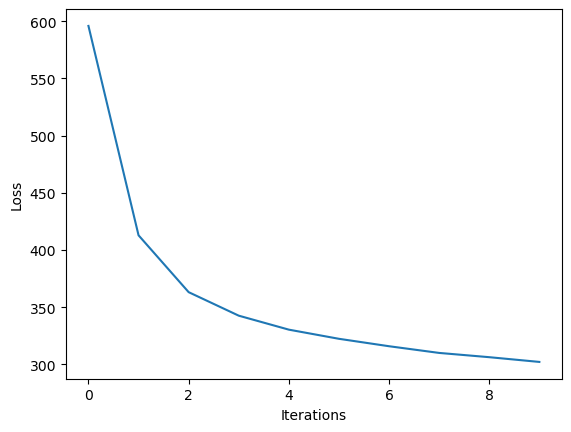



Mean Absolute Error on training set is 302.2367248535156

r2 Score =  0.9834996461868286


In [111]:
plt.plot(np.squeeze(history.history["loss"]))
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.show()
    
print("\n\nMean Absolute Error on training set is {}".format(history.history["mean_absolute_error"][-1]))
    
r2_s = r2_score(results, ytest)
print ("\nr2 Score = ", r2_s)  

In [117]:
yy = np.squeeze(ytest).tolist()
rr = np.squeeze(results, axis=1).tolist()

In [118]:
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.plot(yy[:100], label='original');
plt.plot(rr[:100], label='prediciton');
plt.legend();

In [119]:
dff = pd.DataFrame({
        'Predicted Price' : rr,
        'Actual Price' : yy
    })

In [120]:
dff.head(10)

,Predicted Price,Actual Price
0,6601.910156,6171
1,5152.803223,5338
2,7825.419922,7184
3,6292.947754,5929
4,9566.603516,9579
5,5290.328125,5132
6,5515.143555,5305
7,4784.075195,4015
8,6074.359863,6622
9,5580.875977,5936
